# Convolutional Neural Network

## 이미지 인식에 적용

- 이미지의 2차원적 특성을 딥러닝에 적용

> SLP, MLP : 2차원 이미지 데이터를 1차원 매트릭스로 변환하여 처리

> CNN : 2차원 이미지 데이터를 2차원 매트릭스로 처리

### CNN의 구조

## 이미지 인식의 종류

### 이미지 분류

- 단일개체

### 영상 분할

- 이미지의 경계 식별

### 개체 식별

- 복수 개체 식별

# Convolution(합성곱)

## 2차원 이미지의 특징 도출하는 방법

- 2차원 이미지를 나타내는 행렬에
- 이미지의 특징을 추출하는 행렬(=kernal or filter라고 함)을 곱하여,
- 이미지 행렬과 kernal의 곱셈은 매트릭스의 내적연산이 아니라 원소들 사이의 곱(=매트릭스를 벡터로 고쳐서 벡터의 내적연산 실행=걍 같은위치끼리 곱해서 더하기)으로 계산함
-> 가운데 원래 kernal(filter)의 크기만큼만 남겨두고, 나머지 제외



## Padding

- 0을 다 집어넣는 셀이 있다고 가정 = 전부다 0이 있는게 하나씩 더 있다고 생각(정사각형행렬을 둘러싼 더 큰 정사각 0행렬이 있다고 보기)
-> valid : kernal연산하면, 합성된 행렬크기가 kernal의 크기에 따라 줄어듦
-> same : 합성된 행렬 크기가 원행렬과 같게 만들기 위해 zero채운 뒤 매트릭스 곱셈 수행

## 합성곱의 의미

- 2개의 2차원 배열을 원소별 곱셈(=벡터의 내적계산(dot product)와 동일)
-> 이미지 배열 중 '커널과 계산될 부분'을 일차적 배열로 정렬
-> 커널(필터) 또한 일차원 배열로 늘려놓음

- 두 벡터의 내적계산
(행렬의 곱셈할때 쓰는거)

## 합성곱 신경망의 계산과정

- 입력텐서의 채널 수 :L
- 필터 수 : O, 필터(커널)의 크기 : [k,k]

### 1개의 필터를 입력채널에 대해서 적용

- 입력 채널의 데이터와 필터의 내적을 계산하는데, 입력채널이 L개이고, 필터 크기가 [k,k]이면, 1개의 필터는 k*k*L개의 데이터가 적용
-> 예) k=3이면, x1의 9개의 셀의 값과 필터가 곱해지고, 입력채널이 32개이면, 32*9개의 셀의 값과 필터가 곱해짐
- 1개의 필터를 L개의 입력채널에 적용한 결과는 L개의 입력 채널 데이터들의 선형회귀식 값을 구하는 것과 같음
- 이렇게 계산된 값이 출력채널의 1개 셀의 값

--> 필터가 O개 이므로, 출력채널(=출력 셀)도 O개가 생김

### 각 필터별로 k*k개의 가중치 있음

- 필터별 파라미터 수 : k * k
- 이 필터를 입력채널 L개에 대해 각각 적용하면, L*( K* K )개의 다른 가중치가 생기는데, 이 가중치를 입력채널의 값과 곱한 후, 계산된 값들을 모두 합한 후, 절편을 더하여 출력채널 값으로 기록(회귀식과 동일)
-> 가중치 : L* k * k
-> 각 필터별 입력채널 전체에 대한 파라미터 수 : L* k*k+1
- O개의 필터에 대해 위 작업 수행 
-> 전체 파라미터 수 : O*(L * k * k+1)

--> 출력 텐서의 채널 수 : O

## ConvNet작동원리 및 파라미터 수의 계산

- 필터 사이즈에 해당하는 2차원 배열의 가중치 매트릭스 생성
-> 예) [3,3]필터일 경우 : 3*3=9개의 가중치를 나타내는 변수가 만들어짐
- 이들 필터가 입력 이미지의 필터 수 만큼 만들어져 각각의 입력 필터와 dot product연산 실행

- 필터 크키 [3,3]이구 채널수 R,G,B로 3개니깐 3x3에다가 채널수 3 곱하구 절편 1더해서 28. 이제 여기다가 필터의 개수 곱해주면 전체 파라미터 수가 나오는 거지


# Convolution Layer

In [21]:
import numpy as np
import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256,input_shape=(784, ),activation='sigmoid'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [30]:
conv1=tf.keras.layers.Conv2D(filters=32,kernel_size=[5,5],padding='same',activation=tf.nn.relu)

- input: 4차원) batch size(레코드 수), 행의 수, 열의 수, 채널의 수(흑백:채널1,칼라:채널3)
-> input_shape(행의수, 열의 수, 채널의 수) 는 배치 레코드 수는 제외하고, 1개 샘플의 차원만 표시
- filters: filter의 개수(필터 많은 수록 특징 추출 많이 가능, 학습시간 오래걸림(=심층신경망 노드 개수와 동일))
- kernel_size: 커널(필터)의 차원
- strides: (1,1)이 기본값: 1칸씩 옮기는 것
-padding
-> same: 차원을 같이 유지, zero값들 추가됨(zero padding)
-> valid : 입력 이미지의 부분 매트릭스와 kernel곱하여, kernel_size에 따라 차원이 줄어들게 됨
- activation(활성화함수): 기본값은 선형함수(계산된 값 그대로 사용)

# Pooling Layer

- 셀들을 대표하는 값 하나로 표시하는 방법
-> 이미지 행렬의 크기를 줄여서 적은 크기의 이미지가 많은 정보를 대표할 수 있도록 하는 작업

## Max-Pooling

- 가장 대표적으로 특징을 잘 나타내는 최대값을 남기는 pooling방법
- 눈에 잘띄는 값만 두고, 나머지 줄여버림
- 하는 이유: 이미지가 너무 크니까 최댓값(눈에 잘띄는 것)만 남기고 나머지 잘라버림
- 일반적 형태 
-> pool_size : pooling하는 윈도우 크기 
-> strides : 2 

## 평균 풀링

# CNN을 이용한 분류(MNIST)

## 데이터 준비

### 데이터 가져오기

In [38]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
X_test.shape

(10000, 28, 28)

In [41]:
y_train.shape

(60000,)

### 시각화해보기

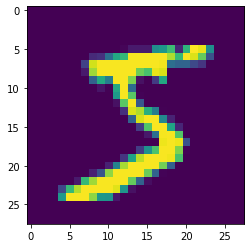

In [44]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

## 데이터 전처리

### Normalization

- 값을 0~1사이로 변환

In [48]:
X_train=X_train/255.0
X_test=X_test/255.0

### 배열의 크기 조정(채널 수 지정)

In [50]:
X_train=X_train.reshape((-1,28,28,1))
X_test=X_test.reshape((-1,28,28,1)) #샘플사이즈 모르니까 맨앞에 -1..?

### 분류 값(y값)을 one-hot인코딩 방식으로 변환

- y값이 5
- 6번째원소가 1인 벡터로 변환 : [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [52]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [53]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 모형 설계

In [54]:
model=tf.keras.models.Sequential()

In [55]:
model.add(tf.keras.layers.Conv2D(input_shape=(28,28,1),
                                 kernel_size=[3,3],
                                 filters=32,
                                 activation='relu'))

In [57]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [58]:
model.add(tf.keras.layers.Conv2D(kernel_size=[3,3],filters=64,activation='relu'))

In [59]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [60]:
model.add(tf.keras.layers.Conv2D(kernel_size=[3,3],filters=64,activation='relu'))

In [61]:
model.add(tf.keras.layers.Flatten())

In [62]:
model.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [63]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
#맨 마지막 노드 개수가 10개인 이유: 0~9까지 2차원 셀들을 1줄로 쭉 열거하기 위해서

# CNN을 이용한 MNIST image analysis

## 모형 컴파일

In [69]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## 모형 학습(훈련)

In [68]:
BATCH_SIZE=64
VALIDATION_SPLIT=0.2

In [70]:
tensorboard=tf.keras.callbacks.TensorBoard(log_dir="D:\myTensorflowDir")

In [71]:
history=model.fit(x=X_train,y=y_train,batch_size=BATCH_SIZE,epochs=20,
                 validation_split=VALIDATION_SPLIT,
                 callbacks=[tensorboard,tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)])

Epoch 1/20
750/750 [==============================] - 108s 135ms/step - loss: 0.2132 - accuracy: 0.9320 - val_loss: 0.0579 - val_accuracy: 0.9832
Epoch 2/20
750/750 [==============================] - 83s 110ms/step - loss: 0.0531 - accuracy: 0.9831 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 3/20
750/750 [==============================] - 79s 105ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.0444 - val_accuracy: 0.9864
Epoch 4/20
750/750 [==============================] - 84s 112ms/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0382 - val_accuracy: 0.9887
Epoch 5/20
750/750 [==============================] - 77s 103ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0415 - val_accuracy: 0.9892
Epoch 6/20
750/750 [==============================] - 73s 97ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.0424 - val_accuracy: 0.9903
Epoch 7/20
750/750 [==============================] - 74s 99ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0408 - val_acc

## 모형 테스트

In [73]:
test_loss,test_accuracy=model.evaluate(x=X_test,y=y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.0319 - accuracy: 0.9916


## 모형 학습 분석

- matplotlib사용하여 직접 plotting

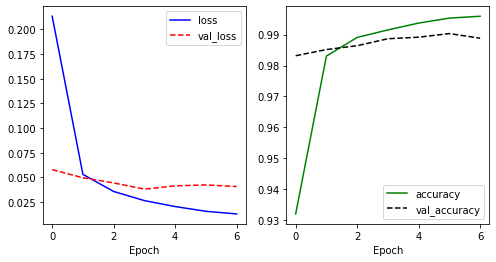

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [76]:
### Tensorboard사용

In [77]:
tensorboard=tf.keras.callbacks.TensorBoard(log_dir="D:\myTensorflowDir")

In [78]:
history=model.fit(x=X_train,y=y_train,batch_size=BATCH_SIZE,epochs=20,
                 validation_split=VALIDATION_SPLIT,
                 callbacks=[tensorboard,tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)])

Epoch 1/20
750/750 [==============================] - 74s 98ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0412 - val_accuracy: 0.9912
Epoch 2/20
750/750 [==============================] - 72s 96ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0547 - val_accuracy: 0.9888
Epoch 3/20
750/750 [==============================] - 72s 96ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0462 - val_accuracy: 0.9909
Epoch 4/20
750/750 [==============================] - 72s 96ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0558 - val_accuracy: 0.9910
